### 1. Visualization of a time series.
- we import the pandas library and create a sample time series data using the pd.Series() function. 
- We specify the values for the time series and provide an index using the pd.date_range() function, which generates a       sequence of dates starting from '2023-01-01' for a period of 10 days with a frequency of 'D' (daily).

- we plot the time series data using the plot() method, specifying the figure size, grid, and title. Finally, we set the     labels for the x-axis and y-axis using xlabel() and ylabel(), respectively, and display the plot using show(). 

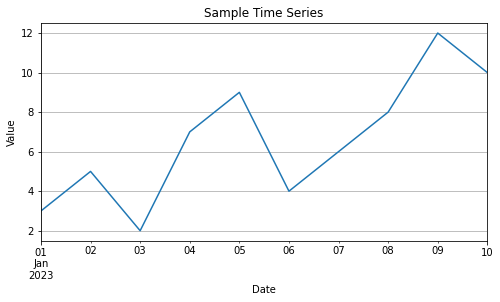

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample time series dataset
data = pd.Series([3, 5, 2, 7, 9, 4, 6, 8, 12, 10],
                 index=pd.date_range(start='2023-01-01', periods=10, freq='D'))

# Visualize the time series
data.plot(figsize=(8, 4), grid=True, title='Sample Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### 2. Decompose the time series into its various components, typically trend, seasonality and residuals.
- Decomposition methods such as moving averages, seasonal decomposition of time series (STL), or Fourier transforms can be   used.

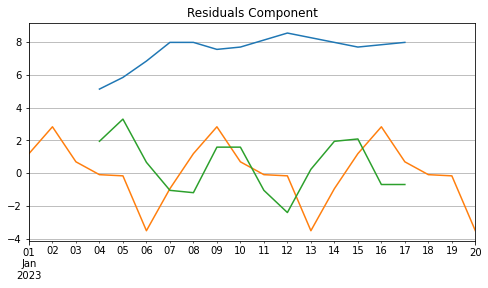

In [2]:
import pandas as pd
import statsmodels.api as sm

# Create a sample time series dataset
data = pd.Series([3, 5, 2, 7, 9, 4, 6, 8, 12, 10, 7, 6, 5, 9, 11, 10, 8, 5, 7, 6],
                 index=pd.date_range(start='2023-01-01', periods=20, freq='D'))

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

# Extract the components
trend = decomposition.trend
seasonality = decomposition.seasonal
residuals = decomposition.resid

# Plot the components
trend.plot(figsize=(8, 4), grid=True, title='Trend Component')
seasonality.plot(figsize=(8, 4), grid=True, title='Seasonality Component')
residuals.plot(figsize=(8, 4), grid=True, title='Residuals Component')

plt.show()

### 3. Stationarity check: 
- if the time series is stationary, meaning its statistical properties like mean and variance remain constant over time.   
- Stationarity is often a prerequisite for many time series models. You can use statistical tests like the 
  Augmented Dickey-Fuller (ADF) test to assess stationarity

In [3]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Create a sample time series dataset
data = pd.Series([3, 5, 2, 7, 9, 4, 6, 8, 12, 10],
                 index=pd.date_range(start='2023-01-01', periods=10, freq='D'))

# Perform ADF test for stationarity
result = adfuller(data)

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')

ADF Statistic: -1.6961855005500748
p-value: 0.4330788856869473
The time series is not stationary.


### 4. Time series modeling: Select an appropriate model based on the characteristics of your time series.                    
####  1.Common models include autoregressive integrated moving average (ARIMA) 
##### 2.seasonal ARIMA (SARIMA), exponential smoothing methods like Holt-Winters, or more advanced techniques like state    space models or recurrent neural networks (RNNs).

In [4]:
import pandas as pd
import statsmodels.api as sm

# Create a sample time series dataset
data = pd.Series([3, 5, 2, 7, 9, 4, 6, 8, 12, 10],
                 index=pd.date_range(start='2023-01-01', periods=10, freq='D'))

# Fit the ARIMA model
model = sm.tsa.ARIMA(data, order=(1, 0, 0))  # ARIMA(p, d, q) order
model_fit = model.fit()

# Make predictions
forecast = model_fit.predict(start='2023-01-11', end='2023-01-15')

print(forecast)

2023-01-11    8.029389
2023-01-12    7.196650
2023-01-13    6.844752
2023-01-14    6.696048
2023-01-15    6.633208
Freq: D, Name: predicted_mean, dtype: float64


### 5.The performance of the trained model by comparing its predictions to the actual values. Common evaluation metrics include mean absolute error (MAE), mean squared error (MSE), or root mean squared error (RMSE). You may need to fine-tune the model or try different models to improve performance.

In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a sample time series dataset
data = pd.Series([3, 5, 2, 7, 9, 4, 6, 8, 12, 10],
                 index=pd.date_range(start='2023-01-01', periods=10, freq='D'))

# Fit the ARIMA model
model = sm.tsa.ARIMA(data, order=(1, 0, 0))  # ARIMA(p, d, q) order
model_fit = model.fit()

# Make predictions
forecast = model_fit.predict(start='2023-01-11', end='2023-01-15')

# Get actual values for the forecast period
actual_values = pd.Series([11, 9, 7, 5, 3],
                          index=pd.date_range(start='2023-01-11', periods=5, freq='D'))

# Calculate evaluation metrics
mae = mean_absolute_error(actual_values, forecast)
mse = mean_squared_error(actual_values, forecast)
rmse = mean_squared_error(actual_values, forecast, squared=False)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MAE: 2.0516929389923058
MSE: 5.635496874072752
RMSE: 2.3739201490515116
